Importando os módulos. São necessárias as bibliotecas externas Pandas e Matplotlib. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from operator import add,truediv

Extraindo os dados de bilhetagem do portal dadosabertos.natal.br em forma de dataframe da biblioteca Pandas.

In [6]:
url = 'http://dados.natal.br/dataset/4fad551d-4d3b-4597-b8d3-7e887e22332e/resource/ec5b95a3-7b93-4346-98f6-1bd013faa651/download/dados-be-2018-analitico.csv'
df = pd.read_csv(url,encoding='ISO-8859–1', sep=';', thousands='.')

Visualizando o dataframe. Estão disponíveis os dados de bilhetagem do mês 1 até o mês 10.

In [7]:
print(df)

     Mês            Empresa  Linha  Estudante_Cartao  Estudante_BT  \
0      1          CONCEIÇÃO     21             13493          9506   
1      1          CONCEIÇÃO     22              4644          3371   
2      1          CONCEIÇÃO     30              8519          5614   
3      1          CONCEIÇÃO     31              9631          6020   
4      1          CONCEIÇÃO     41              6556          4038   
5      1          CONCEIÇÃO     59              8184          6086   
6      1          CONCEIÇÃO     63             21918         14054   
7      1          CONCEIÇÃO     71              7188          5395   
8      1          CONCEIÇÃO     76              2886          1734   
9      1          CONCEIÇÃO     83              4386          3932   
10     1          CONCEIÇÃO    411              5208          2869   
11     1          CONCEIÇÃO    587                 0             0   
12     1          CONCEIÇÃO    599              5074          3082   
13     1          CO

Para analisar o impacto do cadastro biométrico obrigatório para estudantes na bilhetagem é necessário obter as médias de viagens por tipo de pagamento a cada mês. 

In [10]:
stud_avg_card = []
stud_avg_cash = []

full_fare_avg_card = []
full_fare_avg_cash = []

for month in df['Mês'].unique():
    stud_avg_card.append(int(sum(df[df['Mês'] == month]['Estudante_Cartao'])/len(df[df['Mês'] == month])))
    stud_avg_cash.append(int(sum(df[df['Mês'] == month]['Estudante_BT'])/len(df[df['Mês'] == month])))
    full_fare_avg_card.append(int(sum(df[df['Mês'] == month]['Inteira_Cartao'])/len(df[df['Mês'] == month])))
    full_fare_avg_cash.append(int(sum(df[df['Mês'] == month]['Inteira_Especie'])/len(df[df['Mês'] == month])))

Plotando os valores médios do número de viagens de estudantes por meio de pagamento a cada mês. Sabendo-se que o prazo inicial para o cadastro foi até o dia 31/07 e depois prorrogado para o dia 31/08, os dados até o mês 6 foram plotados em azul (cada ponto é uma linha de ônibus) e os dados do mês 7 em diante em vermelho, caracterizando o período a partir da exigência do cadastro. Outro dado para se levar em consideração é que os meses 1,2 e 7 são meses de férias escolares e portanto espera-se um menor fluxo de estudantes no transporte urbano.

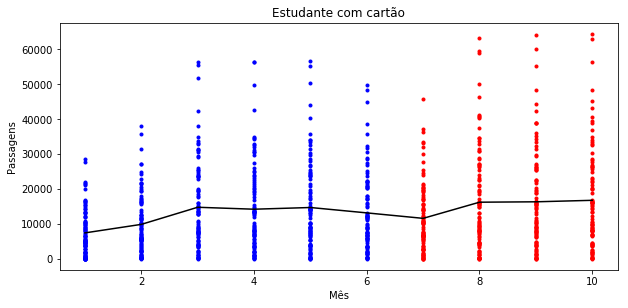

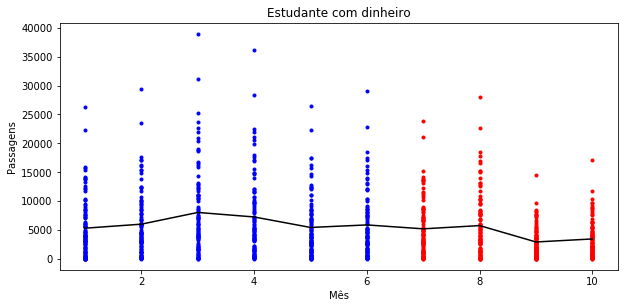

In [11]:
plt.figure(figsize=(10,10))    
    
plt.subplot(211)
plt.plot(df[df['Mês'] < 7]['Mês'], df[df['Mês'] < 7]['Estudante_Cartao'],'b.')
plt.plot(df[df['Mês'] >= 7]['Mês'], df[df['Mês'] >= 7]['Estudante_Cartao'],'r.')
plt.plot(df['Mês'].unique(), stud_avg_card, 'k-')
plt.title('Estudante com cartão')
plt.ylabel('Passagens')
plt.xlabel('Mês')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(212)
plt.plot(df[df['Mês'] < 7]['Mês'], df[df['Mês'] < 7]['Estudante_BT'],'b.')
plt.plot(df[df['Mês'] >= 7]['Mês'], df[df['Mês'] >= 7]['Estudante_BT'],'r.')
plt.plot(df['Mês'].unique(), stud_avg_cash, 'k-')
plt.title('Estudante com dinheiro')
plt.ylabel('Passagens')
plt.xlabel('Mês')
plt.show()





Pode-se observar uma diminuição do número médio de viagens (plotado em preto) de estudantes usando dinheiro como meio de pagamento nos meses 9 e 10, logo após o esgotamento dos prazos para o cadastro biométrico. Alinhado a isso, vê-se um aumento desse número nas viagens com cartão durante o mesmo período.

Embora seja preciso uma comparação com outros anos para corrigir por eventuais sazonalidades, os dados disponíveis sugerem que a adoção do cadastro biométrico fez com que mais estudantes preferissem o pagamento por meio de crédito no cartão ao em espécie.

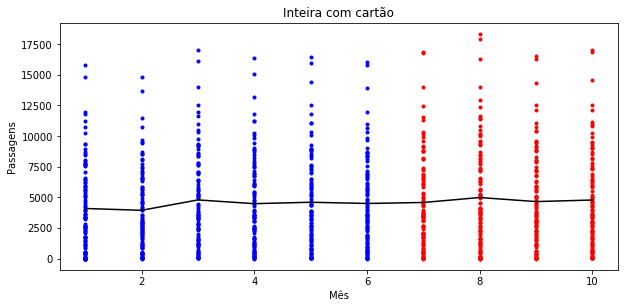

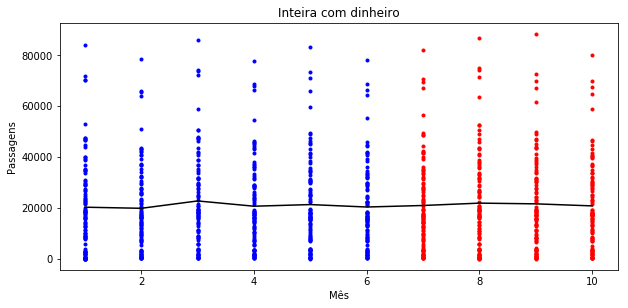

In [13]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(df[df['Mês'] < 7]['Mês'], df[df['Mês'] < 7]['Inteira_Cartao'],'b.')
plt.plot(df[df['Mês'] >= 7]['Mês'], df[df['Mês'] >= 7]['Inteira_Cartao'],'r.')
plt.plot(df['Mês'].unique(), full_fare_avg_card, 'k-')
plt.title('Inteira com cartão')
plt.ylabel('Passagens')
plt.xlabel('Mês')
plt.show()

plt.figure(figsize=(10,10))

plt.subplot(212)
plt.plot(df[df['Mês'] < 7]['Mês'], df[df['Mês'] < 7]['Inteira_Especie'],'b.')
plt.plot(df[df['Mês'] >= 7]['Mês'], df[df['Mês'] >= 7]['Inteira_Especie'],'r.')
plt.plot(df['Mês'].unique(), full_fare_avg_cash, 'k-')
plt.title('Inteira com dinheiro')
plt.ylabel('Passagens')
plt.xlabel('Mês')
plt.show()

Uma outra consequência que esperava-se com a exigência do cadastro biométrico era a redução no número de fraudes (pessoas usando cartões estudantis de terceiros), no entanto ao plotar os números médios de viagens com tarifa inteira não observam-se aumentos em nenhum dos dois métodos de pagamento.

Calculando e plotando as razões mensais de bilhetagem inteira/estudante para averiguar se houve alguma alteração visível nessa relação. 

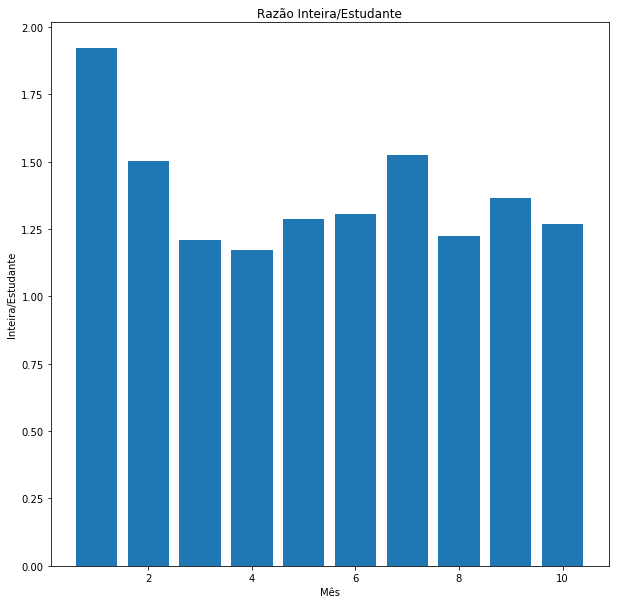

In [9]:
student_total = list(map(add, stud_avg_card, stud_avg_cash))
full_fare_total = list(map(add, full_fare_avg_card, full_fare_avg_cash))
ratio = list(map(truediv,full_fare_total,student_total))

plt.figure(figsize=(10,10))

plt.bar(df['Mês'].unique(),ratio)
plt.title('Razão Inteira/Estudante')
plt.ylabel('Inteira/Estudante')
plt.xlabel('Mês')
plt.show()

Os meses com maior razão inteira/estudante são aqueles de férias escolares, como esperado. Fora isso, não se observa aumento algum na razão nos meses que sucedem a exigência do cadastro biométrico. 